**Ensemble de données :** Cet ensemble de données provient de l’Institut national du diabète et des maladies digestives et rénales. L’objectif de l’ensemble de données est de prédire de façon diagnostique si un patient est diabétique ou non, en fonction de certaines mesures diagnostiques incluses dans l’ensemble de données.

 **Objectif** : Le principal objectif est de classifier si une personne perticulaire est diabétique ou non à l’aide de plusieurs variables indépendantes données dans l’ensemble de données.

**Description de l’ensemble de données :** Les ensembles de données comprennent 9 variables indépendantes et une variable dépendante:					
- Pregnancies : Nombre de grossesses
-Glucose : concentration plasmatique de glucose de 2 heures dans un test de tolérance au glucose par voie orale
-BloodPressure : pression artérielle diastolique (mm Hg)
-SkinThickness Épaisseur du pli triceps (mm)
-Insulin : insuline sérique de 2 heures (mu U/ml)
-BMI : Indice de masse corporelle (poids en kg/(hauteur en m) 2)
-DiabetesPedigreeFunction : Fonction pedigree de diabète
-Age : Âge (années)
-Outcome : 1 comme diabites détectés et 0 comme non détraqués

In [ ]:
install.packages("rpart")
install.packages("rpart.plot")
install.packages("ISLR")
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [ ]:
library(caret)


Loading required package: ggplot2

Loading required package: lattice



In [ ]:
# Pour le modèle de CART
library(rpart)
# Pour la visualisation de l'arbre de décision
library(rpart.plot)
# Contient le dataest "Carseats" qu'on va utiliser pour l'implémentation
library(ISLR)
# pour ignorer les warning
options(warn=-1)

In [ ]:
#read file diabetes
diabetes<-read.csv("/content/diabetes.csv",header = T) 
head(diabetes)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0


In [ ]:
summary(diabetes)

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

In [ ]:
str(diabetes)

'data.frame':	768 obs. of  9 variables:
 $ Pregnancies             : int  6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose                 : int  148 85 183 89 137 116 78 115 197 125 ...
 $ BloodPressure           : int  72 66 64 66 40 74 50 0 70 96 ...
 $ SkinThickness           : int  35 29 0 23 35 0 32 0 45 0 ...
 $ Insulin                 : int  0 0 0 94 168 0 88 0 543 0 ...
 $ BMI                     : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                     : int  50 31 32 21 33 30 26 29 53 54 ...
 $ Outcome                 : int  1 0 1 0 1 0 1 0 1 1 ...


In [ ]:
set.seed(2)
# en utilisant la fonction sample() pour diviser les données en ensemble d'entraînement et  de test
id <- sample(2,nrow(diabetes),prob = c(0.7,0.3),replace=TRUE)
diabetes_train <- diabetes[id==1,]
diabetes_test <- diabetes[id==2,]

## Arbre de décision pour la régression

 ### Entraînement l'arbre de décision

In [ ]:
fit.tree = rpart(Outcome ~ ., data=diabetes_train, method = "class", cp=0.008)
fit.tree

n= 532 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

   1) root 532 184 0 (0.65413534 0.34586466)  
     2) Glucose< 157.5 462 125 0 (0.72943723 0.27056277)  
       4) BMI< 26.75 114   4 0 (0.96491228 0.03508772) *
       5) BMI>=26.75 348 121 0 (0.65229885 0.34770115)  
        10) Glucose< 99.5 92  14 0 (0.84782609 0.15217391) *
        11) Glucose>=99.5 256 107 0 (0.58203125 0.41796875)  
          22) Age< 28.5 108  29 0 (0.73148148 0.26851852)  
            44) SkinThickness>=5 89  17 0 (0.80898876 0.19101124) *
            45) SkinThickness< 5 19   7 1 (0.36842105 0.63157895) *
          23) Age>=28.5 148  70 1 (0.47297297 0.52702703)  
            46) DiabetesPedigreeFunction< 0.2225 25   7 0 (0.72000000 0.28000000) *
            47) DiabetesPedigreeFunction>=0.2225 123  52 1 (0.42276423 0.57723577)  
              94) BMI< 43.1 112  52 1 (0.46428571 0.53571429)  
               188) BloodPressure>=83 30  11 0 (0.63333333 0.36666667)  
                 3

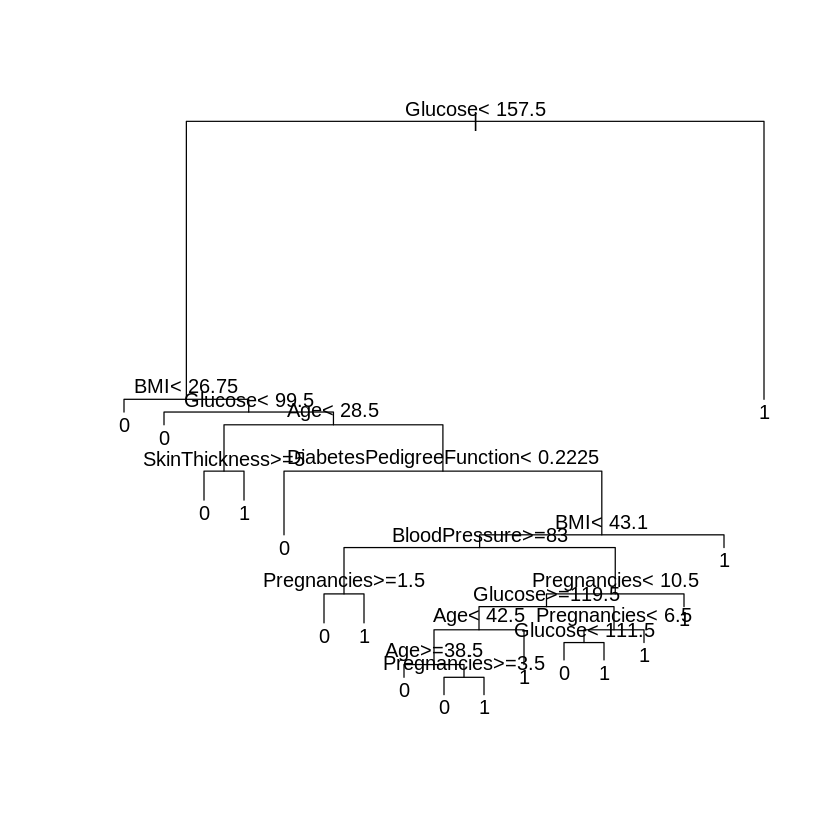

In [ ]:
# Tracer les arbres
par(xpd = NA) # Évitez de couper le texte dans certains dispositifs
plot(fit.tree)
text(fit.tree, digits = 3)

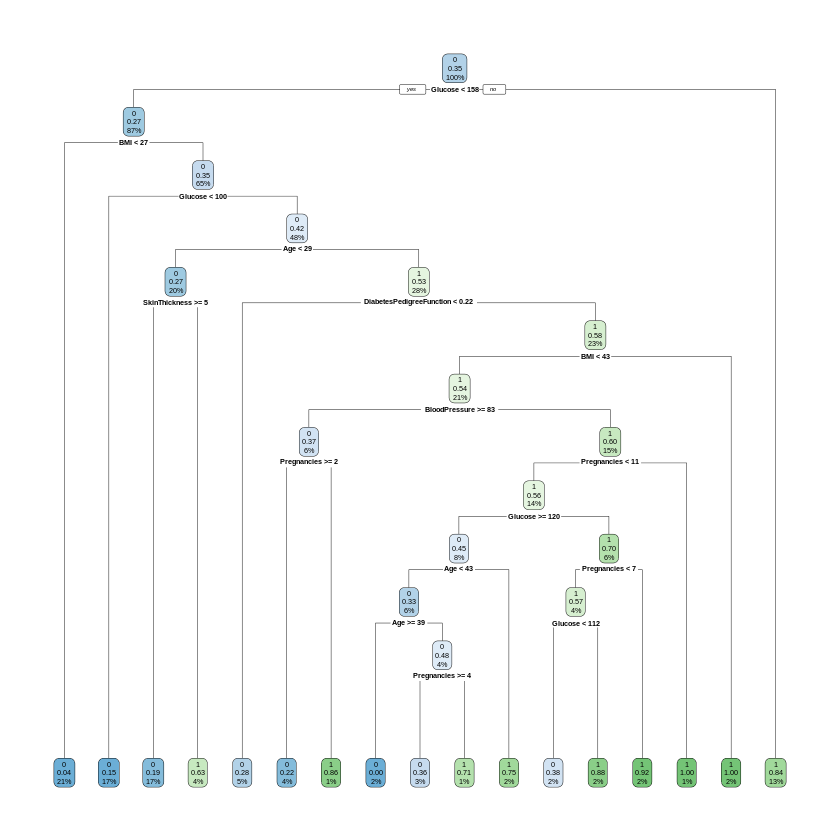

In [ ]:
rpart.plot(fit.tree)

#### Prédiction sur ensemble de test et évaluation

In [ ]:
# Faire des prédictions sur les données du test
pred.tree = predict(fit.tree, diabetes_test,type = "class")

2  5  6  8 13 16 
 0  1  0  0  1  1 
Levels: 0 1

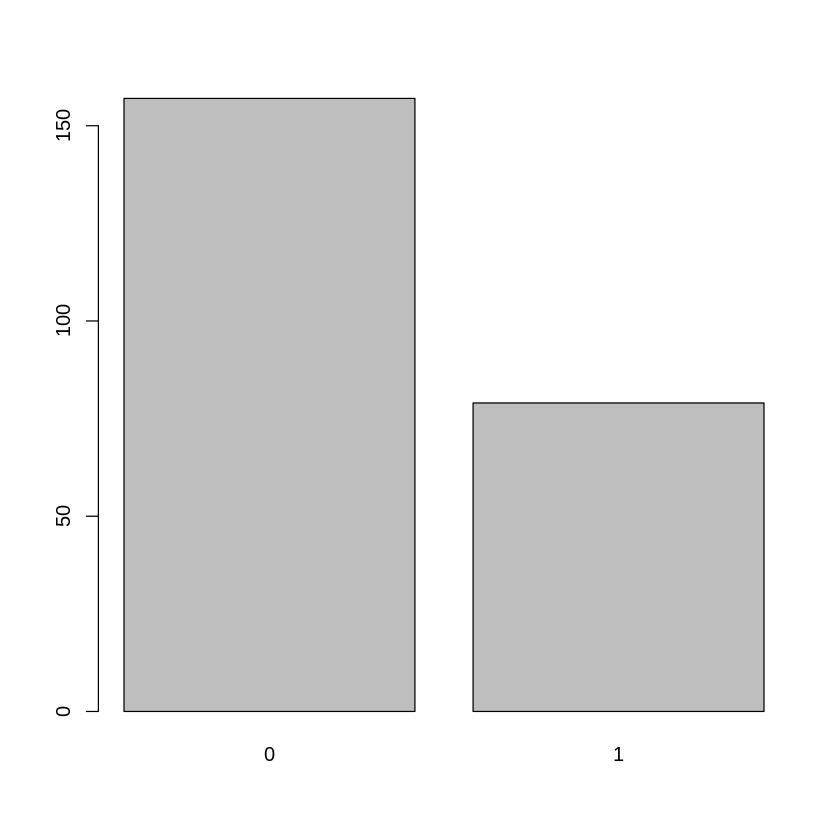

In [ ]:
head(pred.tree)
plot(pred.tree)

In [ ]:
# Calculer le taux de précision du modèle sur les données de test
mean(pred.tree == diabetes_test$Outcome)

[1] 0.7669492

### Élagage 

In [ ]:
# Ajuster le modèle sur l'ensemble de données d'entrainement
set.seed(123)
model2 <- train(
  formula = outcome ~., data = diabetes_train, method = "rpart",
  trControl = trainControl("cv", number = 10),
  tuneLength = 10)

Something is wrong; all the RMSE metric values are missing:
      RMSE        Rsquared        MAE     
 Min.   : NA   Min.   : NA   Min.   : NA  
 1st Qu.: NA   1st Qu.: NA   1st Qu.: NA  
 Median : NA   Median : NA   Median : NA  
 Mean   :NaN   Mean   :NaN   Mean   :NaN  
 3rd Qu.: NA   3rd Qu.: NA   3rd Qu.: NA  
 Max.   : NA   Max.   : NA   Max.   : NA  
 NA's   :10    NA's   :10    NA's   :10   


ERROR: ignored

In [ ]:
# Tracez la précision du modèle en fonction de différentes valeurs de cp (paramètre de complexité).
plot(model2)

ERROR: ignored

In [ ]:
# Le meilleur paramètre de réglage cp qui maximise la précision du modèle
model2$bestTune

In [ ]:
# Traçer le modèle finale
par(xpd = NA) # Évitez de couper le texte dans certains dispositifs
plot(model2$finalModel)
text(model2$finalModel,  digits = 3)

In [ ]:
# Decision rules in the model
model2$finalModel